# CarRacing-v0

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import CVAE
from controller import make_controller
from env import make_env
from utils import PARSER
args = PARSER.parse_args(['--config_path', 'configs/carracing.config'])

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "results/{}/{}/record".format(args.exp_name, args.env_name)
model_path_name = "results/{}/{}/tf_vae".format(args.exp_name, args.env_name)

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [6]:
obs.shape

(267, 64, 64, 3)

In [7]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [8]:
vae = CVAE(args)

vae.set_weights(tf.keras.models.load_model(model_path_name, compile=False).get_weights())

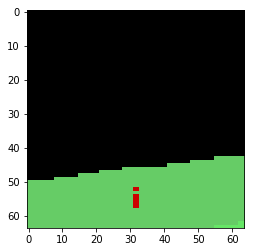

In [9]:
%matplotlib inline
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [10]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

tf.Tensor(
[-1.2504 -1.8788 -0.3254 -1.8268 -1.2159 -1.6966 -0.7093 -0.7183  1.8548 -1.2562  0.2079  1.0571
 -0.5876  0.5541  0.5774 -1.1677  0.2109 -1.3798  1.3519  0.0945  0.8271 -0.7629 -0.4054 -1.0353
 -0.5024  1.1497  0.2965 -0.0068 -1.2808 -0.645   0.6987 -2.362 ], shape=(32,), dtype=float32)


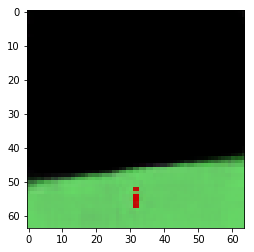

In [11]:
%matplotlib inline
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()

## Dream Samples

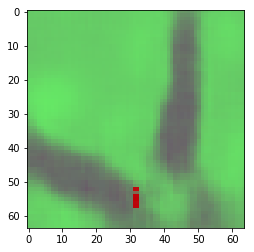

In [12]:
%matplotlib inline
batch_z = tf.random.normal((1, args.z_size)).numpy()
reconstruct = vae.decode(batch_z)
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()

## Driving in true environment
visualize what the agent sees when driving in the true environment

In [13]:
def sim(c, env, vae, is_true_env=False, z_size=64, max_ep_len=1000):
    o = env.reset()
    r_list = []
    total_r_list = []
    true_frames = []
    if is_true_env:
        o, frame = o
        true_frames.append(tf.squeeze(frame))
        z = np.expand_dims(o[:z_size], axis=0)
        reconstruct = vae.decode(z)
    else:
        z = np.expand_dims(o[:z_size], axis=0)
        reconstruct = vae.decode(z)
    decoded_frames = [tf.squeeze(reconstruct)]
    
    for _ in range(max_ep_len): # episode length is a thousand
        a = c.get_action(o)
        o, r, d, _ = env.step(a)
        r_list.append(r)
        total_r_list.append(sum(r_list))
        if is_true_env:
            env.render('rgb_array')
            o, frame = o
            true_frames.append(tf.squeeze(frame))
            z = np.expand_dims(o[:z_size], axis=0)
            reconstruct = vae.decode(z)
        else:
            z = np.expand_dims(o[:z_size], axis=0)
            reconstruct = vae.decode(z)
        decoded_frames.append(tf.squeeze(reconstruct))
        
        if d:
            break
    return decoded_frames, true_frames, r_list, total_r_list

In [14]:
c = make_controller(args)
c.load_model('results/{}/{}/log/{}.cma.16.4.json'.format(args.exp_name, args.env_name, args.env_name))
true_env = make_env(args, dream_env=False, with_obs=True)
reconstruct_episode, true_episode, true_r, true_total_r = sim(c, true_env, vae, is_true_env=True, z_size=args.z_size, max_ep_len=args.max_frames)
true_env.close()

loading file results/WorldModels/CarRacing-v0/log/CarRacing-v0.cma.16.4.json
making real CarRacing environment
Track generation: 1170..1475 -> 305-tiles track


<IPython.core.display.Javascript object>


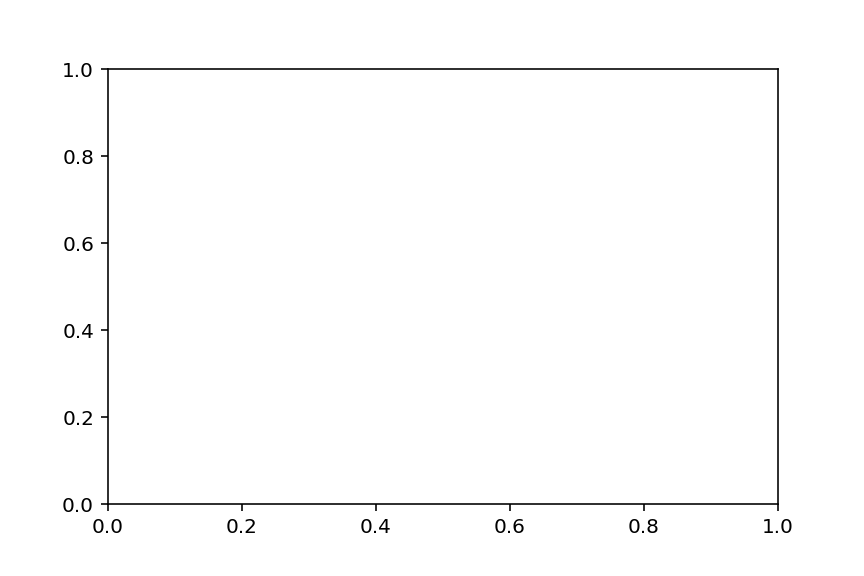

<IPython.core.display.Javascript object>


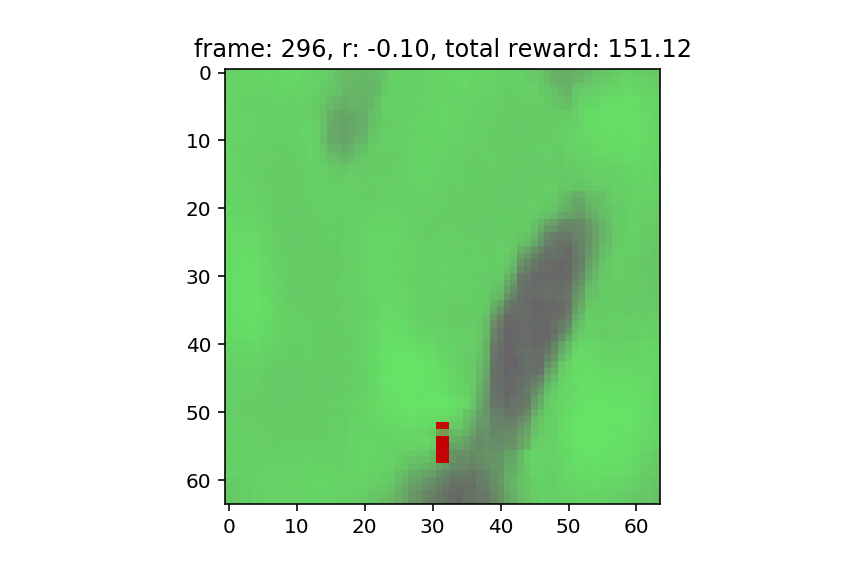

In [45]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
# stupid jupyter bug, just keep copy pasting until it works

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation

f1 = plt.figure(1)
ax1 = f1.gca()

f2 = plt.figure(2)
ax2 = f2.gca()

image1 = plt.imshow(true_episode[0].numpy(), interpolation='None', animated=True)
image2 = plt.imshow(true_episode[0].numpy(), interpolation='None', animated=True)

def function_for_animation_true(frame_index):
    image1.set_data(true_episode[frame_index+1].numpy())
    ax1.set_title('frame: {}, r: {:.2f}, total reward: {:.2f}'.format(frame_index, true_r[frame_index+1], true_total_r[frame_index+1]))
    return image1,

def function_for_animation_recon(frame_index):
    image2.set_data(reconstruct_episode[frame_index+1].numpy())
    ax2.set_title('frame: {}, r: {:.2f}, total reward: {:.2f}'.format(frame_index, true_r[frame_index+1], true_total_r[frame_index+1]))
    return image2,




In [33]:
ani1 = matplotlib.animation.FuncAnimation(f1, function_for_animation_true, interval=40, frames=len(true_episode), blit=True)
plt.show()


In [46]:
ani2 = matplotlib.animation.FuncAnimation(f2, function_for_animation_recon, interval=40, frames=len(true_episode), blit=True)


## Return Plot for Controller

In [16]:
ls

__pycache__/               launch_scripts/  series.py
car_racing.ipynb           logs/            test/
configs/                   nohup.out        train.py
controller.py              results/         utils.py
encode-decode-video.ipynb  rnn/             vae/
env.py                     rnn_train.py     vae-gan.ipynb
es.py                      run_log1         vae-gan_origin.ipynb
extract.py                 runlog.txt       vae_train.py
filecount.py               saved-models/    visualizations.ipynb
gan.py                     saved-models2/


In [17]:
eager_filepath = os.path.join('results/{}/{}/log/{}.cma.16.4.eval_hist.json'.format(args.exp_name, args.env_name, args.env_name))
eager_filepath = "/app/WorldModels/results/WorldModels/CarRacing-v0/log/CarRacing-v0.cma.16.4.eval_hist.json"
og_filepath = os.path.join('results/WorldModels/CarRacing-v0/log', 'CarRacing-v0.cma.16.4.hist_best.json')
with open(eager_filepath, 'r') as f:
  eager_data = json.load(f)
with open(og_filepath, 'r') as f:
  og_data = json.load(f)

eager_data = np.array(eager_data)
og_data = np.array(og_data)

eager_comparison_max = eager_data[-1, 0] # b/c we didnt run for 2k
og_max_idx = np.sum(np.array(og_data[: ,0],dtype=np.float) <= eager_comparison_max)
print(og_max_idx)

og_data = np.array(og_data)[:og_max_idx]

12


In [18]:
eager_data

array([[  0.    , -20.9073,  24.4989, -46.3087,  34.0579],
       [ 10.    ,  71.6228, 113.2957, -48.553 , 306.0402],
       [ 20.    ,  46.5423,  58.129 , -37.9562, 113.5231],
       [ 30.    , 265.9272,  64.0816, 170.7581, 401.7793],
       [ 40.    , 296.586 , 108.1661, 134.8993, 436.2318],
       [ 50.    , 336.3161,  24.4402, 303.5714, 373.1543],
       [ 60.    , 361.2188,  48.905 , 275.8389, 424.3445],
       [ 70.    , 393.5098, 149.4917,  17.4377, 505.0724],
       [ 80.    , 419.3477, 169.3681,  35.2313, 553.4296],
       [ 90.    , 433.8402, 127.8516, 220.2846, 622.0216],
       [100.    , 467.853 ,  86.8422, 316.1073, 628.2608],
       [110.    , 480.0686,  83.1622, 341.6058, 595.6521]])

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


(array([-20.9073,  71.6228,  46.5423, 265.9272, 296.586 , 336.3161, 361.2188, 393.5098, 419.3477,
        433.8402, 467.853 , 480.0686]),
 array([ 24.4989, 113.2957,  58.129 ,  64.0816, 108.1661,  24.4402,  48.905 , 149.4917, 169.3681,
        127.8516,  86.8422,  83.1622]))

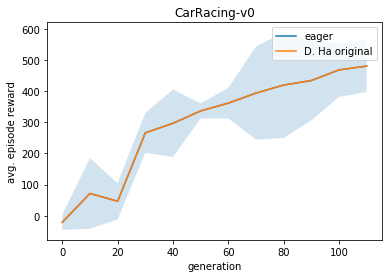

In [19]:
%matplotlib inline
%matplotlib inline
%matplotlib inline

eager_x = eager_data[:, 0]
eager_ret = eager_data[:, 1]
eager_std = eager_data[:, 2]

og_x = np.array(og_data[:, 0], dtype=np.float)
og_ret = np.array(og_data[:, 5], dtype=np.float)
# don't have access to standard deviation of the og evaluation

plt.figure()
plt.plot(eager_x, eager_ret)
plt.fill_between(eager_x, eager_ret-eager_std, eager_ret+eager_std, alpha=0.2)
plt.plot(og_x, og_ret)

plt.title('CarRacing-v0')
plt.ylabel('avg. episode reward')
plt.xlabel('generation')
plt.legend(['eager', 'D. Ha original'])

eager_ret, eager_std

In [20]:
eager_x, eager_ret, og_x, og_ret

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 array([-20.9073,  71.6228,  46.5423, 265.9272, 296.586 , 336.3161, 361.2188, 393.5098, 419.3477,
        433.8402, 467.853 , 480.0686]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 array([-20.9073,  71.6228,  46.5423, 265.9272, 296.586 , 336.3161, 361.2188, 393.5098, 419.3477,
        433.8402, 467.853 , 480.0686]))